# 연습문제 6번

## ID3 Decision Tree ,  CART Decision Tree

## pruning

### wine data load

In [1]:
import numpy as np
import pandas as pd

feature_names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                 'Magnesium', 'Total phenols', 'Flavanoids', 
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                'Hue', 'OD280', 'Proline']
data = pd.read_csv('./data/wine/wine.txt', sep=',', 
                   names=['label'] + feature_names)

In [2]:
data

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
x = data.drop(['label'], axis=1)
y = data['label']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

## Decision Tree from scikit-learn

### ID3 Decision Tree ( information gain )

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

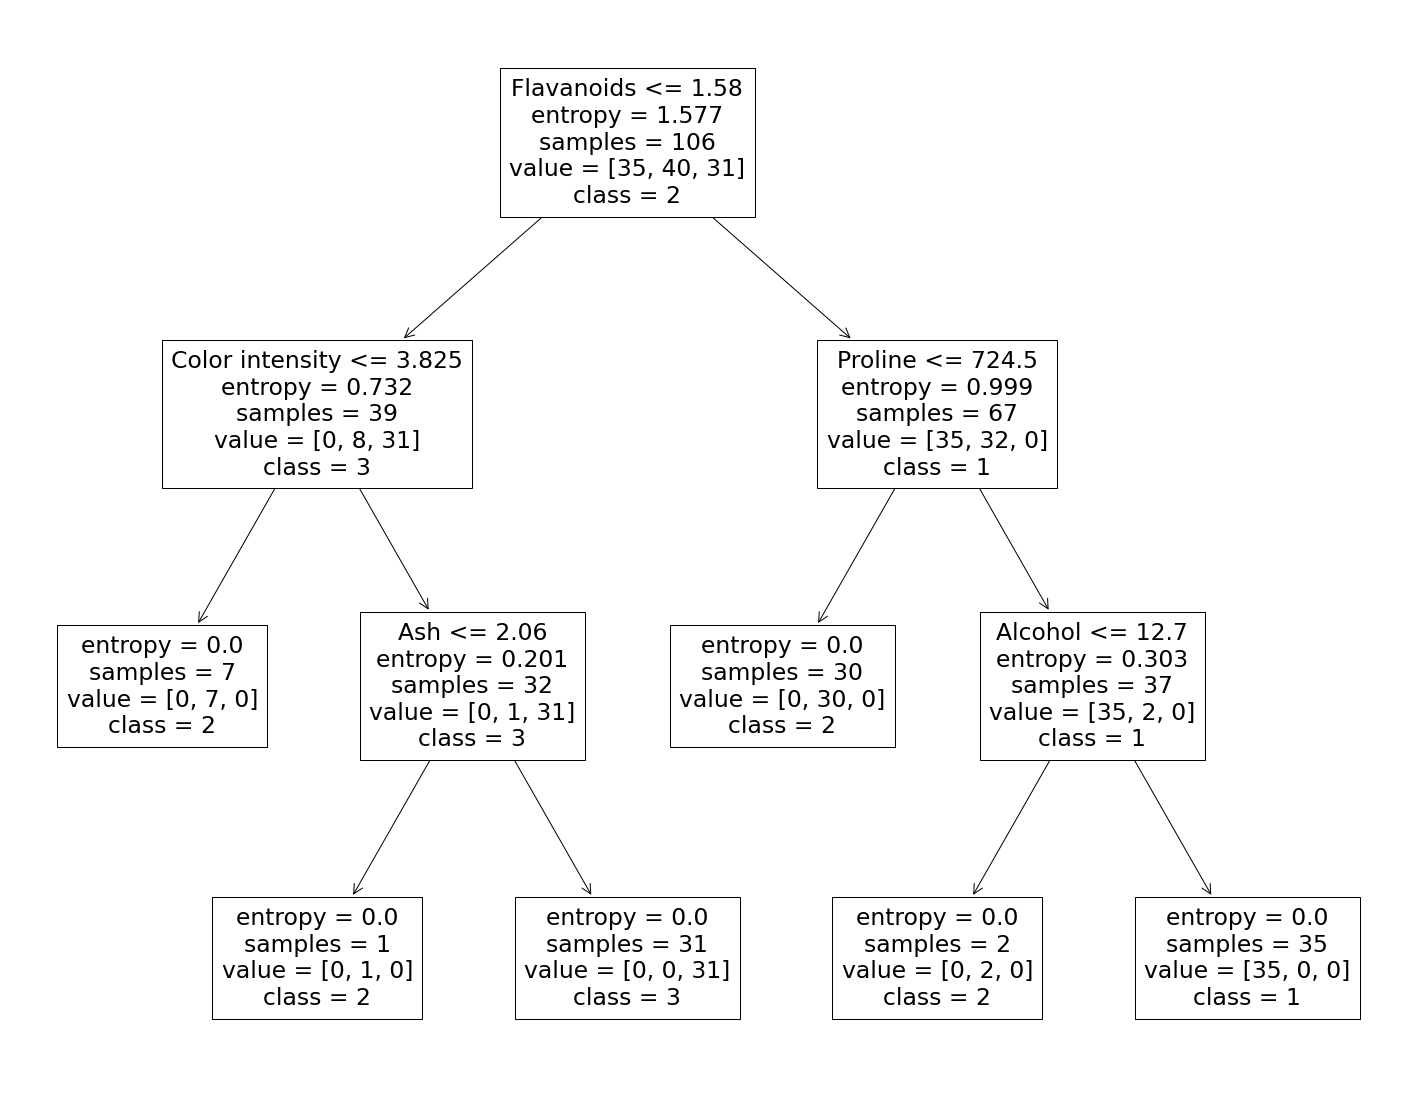

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf, feature_names=feature_names, class_names=['1','2','3'])

In [6]:
clf.score(x_test, y_test)

0.9722222222222222

### CART Decision Tree ( Gini index )

In [9]:
clf = DecisionTreeClassifier(criterion='gini')

clf.fit(x_train, y_train)

DecisionTreeClassifier()

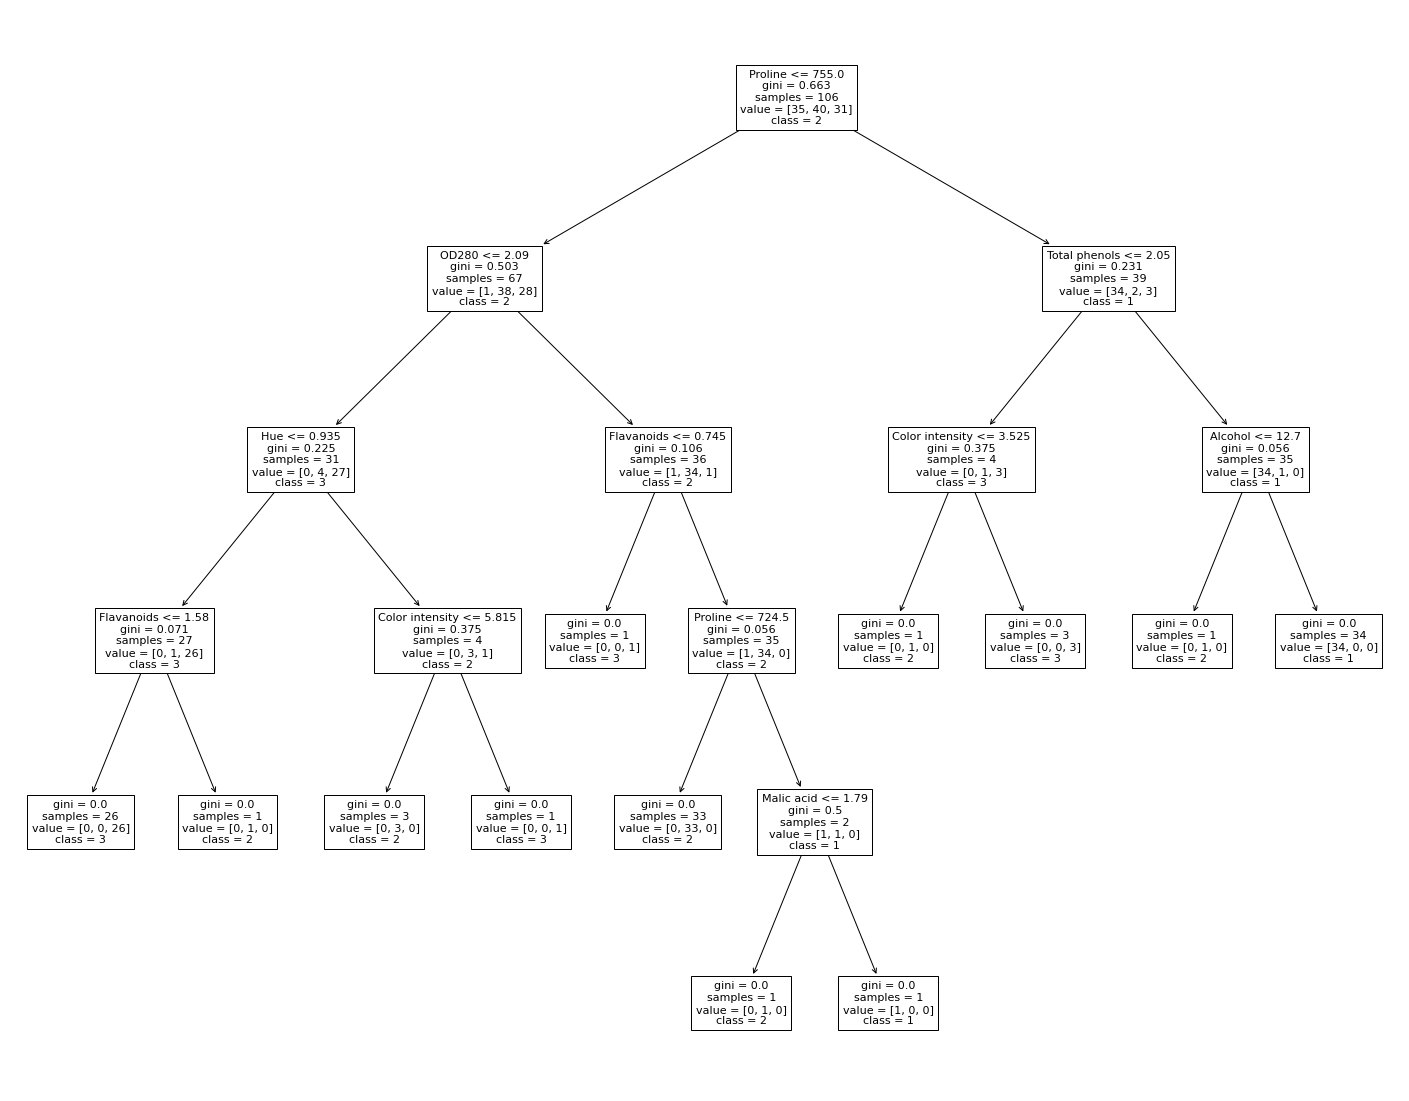

In [10]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf, feature_names=feature_names, class_names=['1','2','3'])

### custom ID3 Decision Tree

In [39]:
import math

class Node:
    def __init__(self, label=None):
        self.feature_name = None
        self.t = None
        self.criterion = None
        
        self.samples = None
        self.label_samples = None
        
        self.feature_val_lst = []
        self.child_node_lst = []
        
        self.label = label

In [ ]:
class DecisionTree:
    def __init__(self, criterion='entropy'):
        self.criterion = criterion
    
    def AllEqual(self, D, A):
        for att in A:
            if len(D[att].unique()) > 1:
                return False
        return True
    
    def Entropy(self, D):
        ent = 0
        length = len(D)

        for count in D['label'].value_counts():
            p = count / length
            ent -= p * math.log(p, 2)
        return ent
    
    def Gain(self, D, a):
        a_val_lst = np.sort(D[a].unique())
        gain_lst = []  # (gain, t)
        length = len(D)
        ent_D = self.Entropy(D)
        
        for i in range(len(a_val_lst) - 1):
            t = (a_val_lst[i] + a_val_lst[i+1]) / 2
            gain = ent_D

            for i in range(2):
                D_t = D[(-1)**i * D[a] < (-1)**i * t]
                gain -= self.Entropy(D_t) * len(D_t) / length
            gain_lst += [(gain, t)]

        return max(gain_lst, key=lambda x: x[0])
    
    def Gini(self, D):
        gini = 1
        length = len(D)

        for count in D['label'].value_counts():
            p = count / length
            gini -= p * p
        return gini
    
    def Gini_index(self, D, a):
        a_val_lst = np.sort(D[a].unique())
        Gini_index_lst = [] # (gini_index, t)
        length = len(D)
        
        for i in range(len(a_val_lst) - 1):
            t = (a_val_lst[i] + a_val_lst[i+1]) / 2
            gini_index = 0

            for i in range(2):
                D_t = D[(-1)**i * D[a] < (-1)**i * t]
                gini_index += self.Gini(D_t) * len(D_t) / length
            gini_index_lst += [(gini_index, t)]

        return min(gini_index_lst, key=lambda x: x[0])
    
    def BestAtt(D, A):   
        if self.criterion == 'entropy':
            gain_lst = [] # (gain, attribute, t)

            for att in A:
                gain, t = self.Gain(D, att)
                gain_lst += [(gain, att, t)]

            return max(gain_lst, key=lambda x: x[0])
        
        elif self.criterion == 'gini':
            gini_index_lst = [] # (gini, attribute, t)
    
            for att in A:
                gini_index, t = self.Gini_index(D, att)
                gini_index_lst += [(gini_index, att, t)]

            return min(gini_index_lst, key=lambda x: x[0])
    
    def TreeGenerate(self, D, A):  # D: data, A: 속성  A_type: set 
        node = Node()
        node.criterion = self.Entropy(D) if self.criterion == 'entropy' else self.Gini(D)
        node.samples = len(D)
        node.label_samples = list(data['label'].value_counts().sort_index().values)
        node.label = D['label'].value_counts().idxmax()

        if len(D['label'].unique()) == 1 or AllEqual(D, A):
            return node

        _, best_att, t = BestAtt(D, A)

        node.feature_name = best_att
        node.t = t

        for i in range(2):
            D_v = D[(-1)**i * D[best_att] < (-1)**i * t]

            node.feature_val_lst += [i]
            node.child_node_lst += [self.TreeGenerate(D_v, A)]
        
        return node
    
    def fit(self, x, y):
        train = pd.concat([x, y], axis=1)
        self.root = self.TreeGenerate(train, set(x.columns))
    
    def predict_tree(self, x, node):
        label = node.label
        for i in range(len(node.feature_val_lst)):
            feature_val = node.feature_val_lst[i]
            
            if x[node.feature_name].values[0] == feature_val:
                label = self.predict_tree(x, node.child_node_lst[i])
                break
        return label
    
    def predict(self, x):
        return self.predict_tree(x, self.root)
    
    def accuracy(self, x, y):
        pred_lst = []
        for i in range(len(x)):
            pred = self.predict(x.iloc[i:i+1])
            pred_lst += [pred]
        
        return np.mean(np.array(pred_lst) == y)
    
    def 

TypeError: 'Dot' object is not iterable

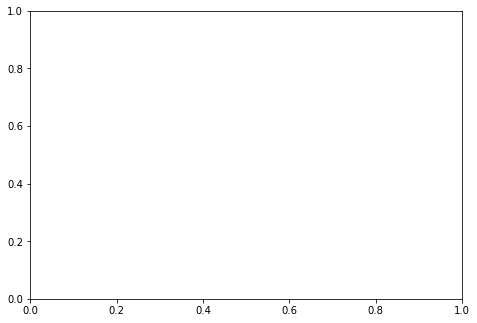

In [52]:
import networkx as nx
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

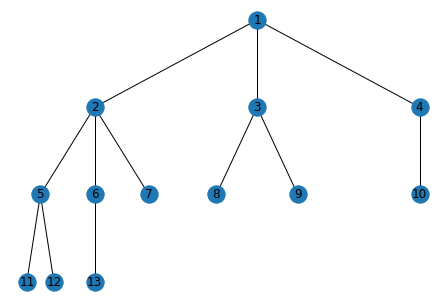

In [62]:
import matplotlib.pyplot as plt
import networkx as nx
G=nx.Graph()
G.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10),
                  (5,11), (5,12), (6,13)])
pos = hierarchy_pos(G,1)    
nx.draw(G, pos=pos, with_labels=True)
plt.savefig('hierarchy.png')

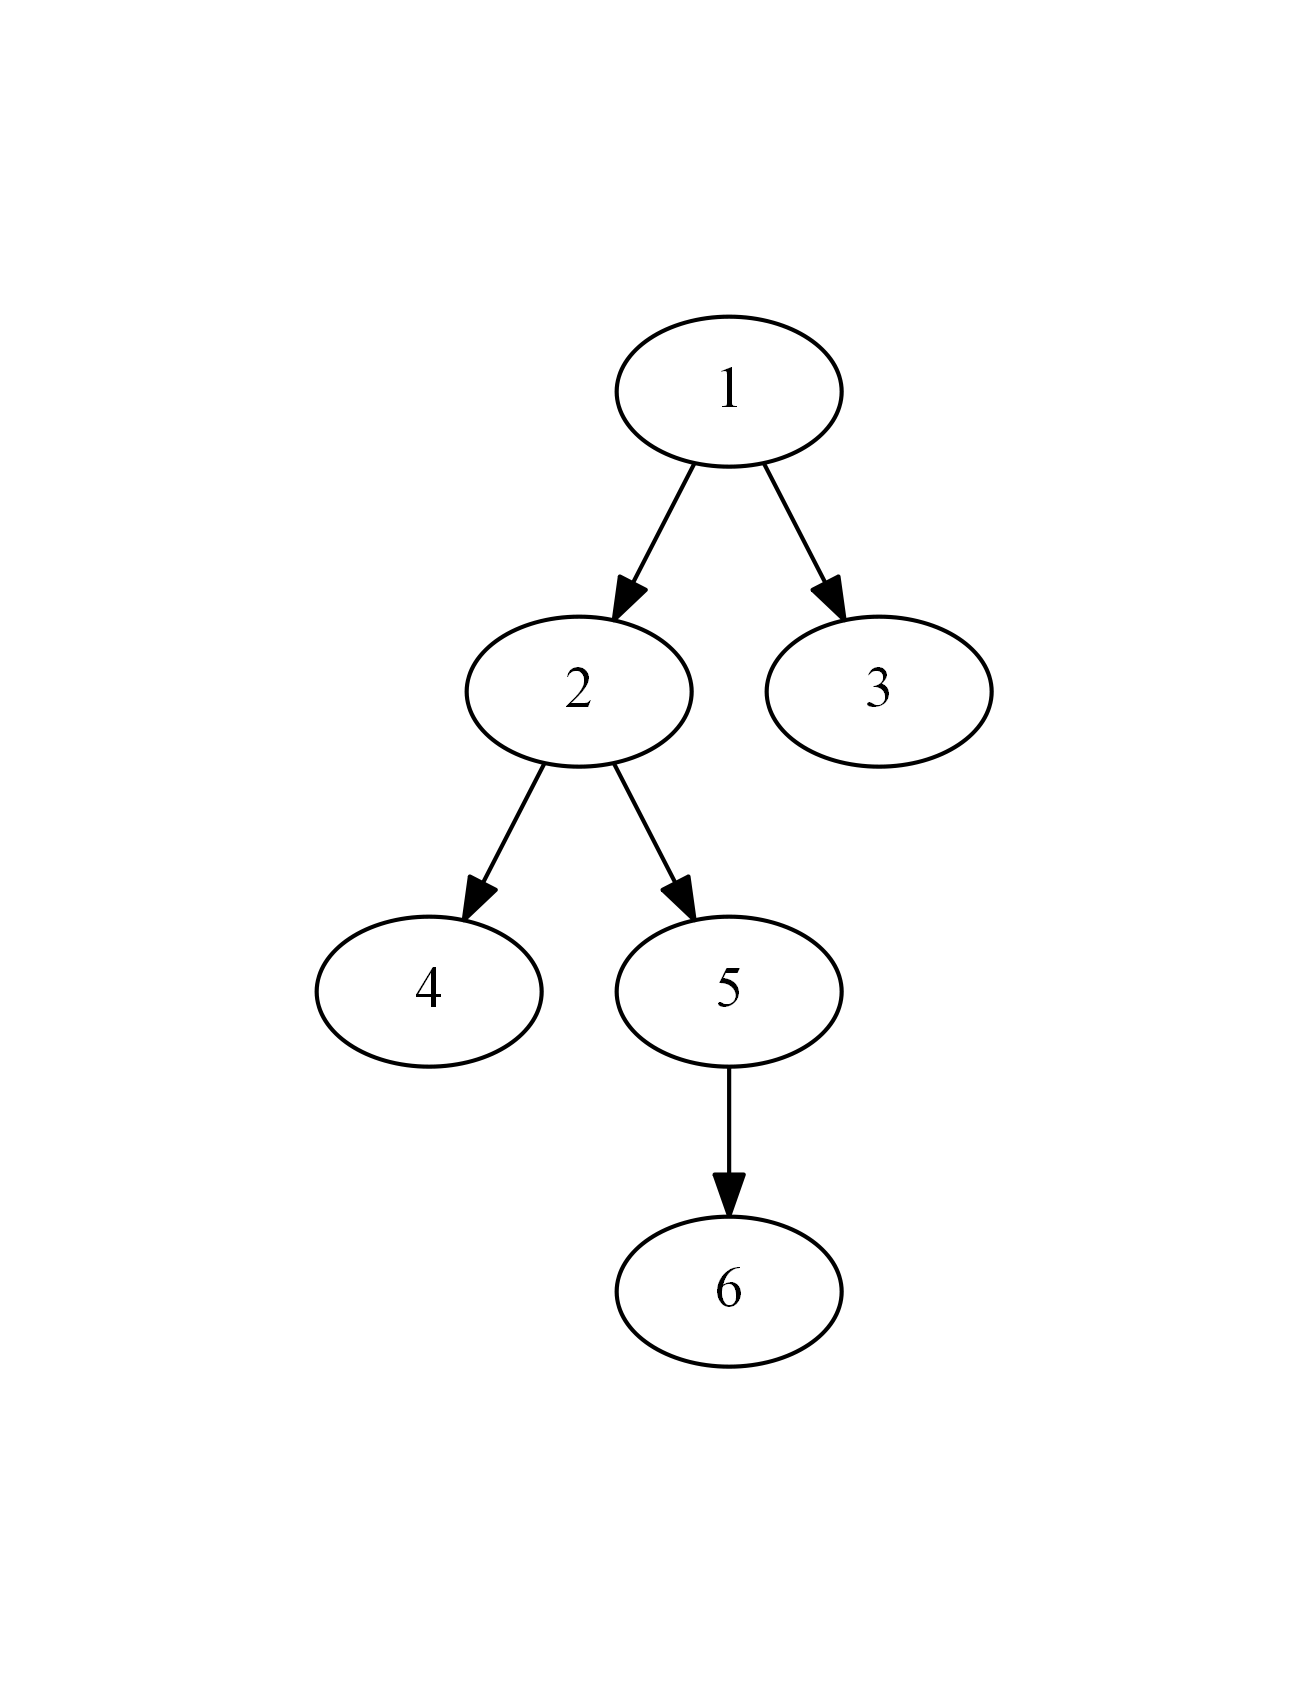

In [64]:
import networkx as nx

g1 = nx.DiGraph()

g1.add_node(1)
g1.add_node(2)
g1.add_node(3)
g1.add_node(4)
g1.add_node(5)
g1.add_node(6)

g1.add_edge(1, 2)
g1.add_edge(1, 3)
g1.add_edge(2, 4)
g1.add_edge(2, 5)
g1.add_edge(5, 6)

from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

d1 = to_pydot(g1)
d1.set_dpi(300)
d1.set_rankdir("dot")
d1.set_margin(1)
Image(d1.create_png(), width=300)

In [67]:
d1

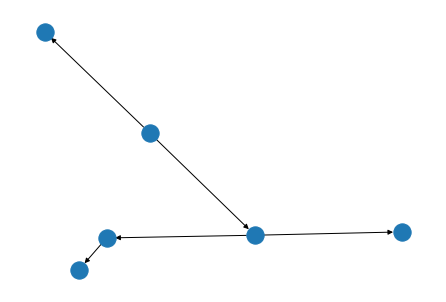

In [66]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

g1 = nx.DiGraph()

g1.add_node(1)
g1.add_node(2)
g1.add_node(3)
g1.add_node(4)
g1.add_node(5)
g1.add_node(6)

g1.add_edge(1, 2)
g1.add_edge(1, 3)
g1.add_edge(2, 4)
g1.add_edge(2, 5)
g1.add_edge(5, 6)

pos = graphviz_layout(g1, prog='dot')
nx.draw(g1)
plt.show()